# Name - Jitendra Lekhwani
# Task - Email spam detection with machine learning

In [37]:
#importing useful libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#loading the dataset
mail_data=pd.read_csv('C:\csv files\oasis\spam.csv',encoding='latin-1')

In [3]:
mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## performing basic operations on the dataset

In [4]:
#dropping unnamed columns from the dataframe
mail_data=mail_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
mail_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail_data.shape

(5572, 2)

In [7]:
#renaming the columns of the dataset
mail_data=mail_data.rename(columns={'v1':'Category','v2':'text'})

<AxesSubplot: xlabel='Category', ylabel='count'>

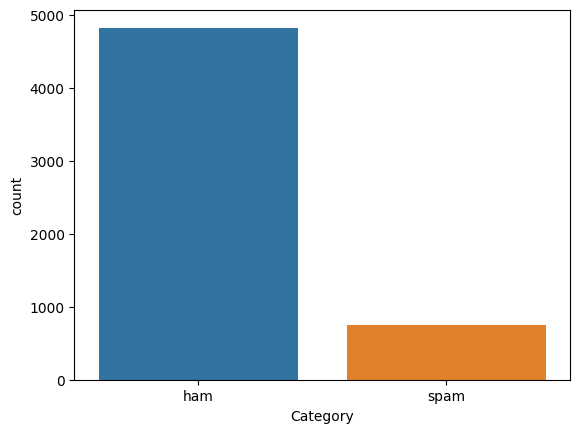

In [8]:
#counting the number of categories in our dataset
sns.countplot(x='Category',data=mail_data)

In [10]:
#'We can see that the amount of ham mails are much more than the amount of spam mails'

In [11]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
#In this we have only one feature vector i.e text and one response matrix as category

## preprocessing the dataset

In [13]:
# importing re library
import re

In [14]:
#converting the category columns into binary labels
mail_data['Category'] = mail_data['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [15]:
mail_data.head()

,Category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#defining the preprocessing function
def preprocess_text(text):
    # Convert all characters to lowercase
    text = text.lower()
    
    # Replace any URLs with the string 'URL'
    text = re.sub(r'http\S+', 'URL', text)
    
    # Replace any email addresses with the string 'EMAIL'
    text = re.sub(r'\S+@\S+', 'EMAIL', text)
    
    # Replace any digits with the string 'NUMBER'
    text = re.sub(r'\d+', 'NUMBER', text)
    
    # Remove any non-word characters (anything that's not a letter, digit, whitespace or underscore)
    text = re.sub(r'[^\w\s_]', '', text)
    
    # Remove any leading or trailing whitespaces
    text = text.strip()
    
    return text

In [17]:
#Applying the preprocess function to the text column
mail_data['text']=mail_data['text'].apply(preprocess_text)

In [19]:
#Now our dataset is ready for applying the machine learning model

## Training and testing the dataset

In [20]:
#In this project we will be using multinomial naive bayes classifier to train our model

In [23]:
#spliting the dataset into training and testing data
x_train,x_test,y_train,y_test=train_test_split(mail_data['text'],mail_data['Category'],test_size=0.3)

In [25]:
#Converting the text data to feature vectors for our machine learning algorithm to work on
vect=CountVectorizer()
train_vectors=vect.fit_transform(x_train)
test_vectors=vect.transform(x_test)

In [26]:
#Training our multinomia naive bayes classifier
model=MultinomialNB()
model.fit(train_vectors,y_train)

MultinomialNB()

## Evaluating the performance of our model

In [27]:
prediction=model.predict(test_vectors)

In [29]:
#We will be using accuracy score and precision score to test the accuracyof our model
print("Accuracy score of the model: ",accuracy_score(y_test,prediction))
print("Precision score of the model: ",precision_score(y_test,prediction,average='weighted'))


Accuracy score of the model:  0.986244019138756
Precision score of the model:  0.9861527129578791


In [30]:
#Both our accuracy and precision score of our model is high meaning that our model is efficient in predicting the new email

In [35]:
#predicting our own email
new_mail=["Congratulations, you have won a free trip to Hawaii! Click here to claim your prize."]
new_vector=vect.transform(new_mail)
print("prediction of new email",model.predict(new_vector))

prediction of new email [1]


In [38]:
import os

In [39]:
os.getcwd()

'C:\\Users\\simran lekhwani'